----------------------------------- ----------------------------------- ----------------------------------- 
----------------------------------- ESPACIO PARA BANNER DE LA MAESTRIA -----------------------------------
----------------------------------- ----------------------------------- ----------------------------------- 

# Descomposición en Valores Singulares. Fundamentos Teóricos.

Este *cuaderno* trata sobre la descomposición en valores singulares como otra forma para reducir dimensión. El objetivo del *cuaderno* es que aprenda que son los componentes principales, que sea capaz de reconocer las características y el funcionamiento de la descomposición en valores singulares, y a construir e implementar este método.

**NO** es necesario editar el archivo o hacer una entrega. Los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar  libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.

## Introducción

En el cuaderno *Fundamentos Teóricos* de la lección sobre PCA se definió la solución del problema de encontrar un indice $f=X \delta'$ que maximice la información contenida en $X$ y que sea de una dimensión menor, a partir de los eigenvalores y los eigenvectores de la matriz de covarianza. Sin embargo, hay otra forma de obtener la solución, basada en la descomposición de valores singulares, o SVD por sus siglas en inglés.  Esta descomposición generaliza la noción de eigenvectores de matrices cuadradas a cualquier tipo de matriz. 


## Definición de SVD

En particular, cualquier matriz real $X$ de dimensión $n\times k$ se puede descomponer de la siguiente manera:

\begin{align}
\underset{n\times k}{\underbrace{X}}=\underset{n\times n}{\underbrace{U}}\underset{n\times k}{\underbrace{S}}\underset{k\times k}{\underbrace{V'}}
\end{align}

donde $U$ es una matriz $n\times n$ cuyas columnas son ortogonales $(U'U=I_{n})$, $V$ es una matriz $k\times k$ cuyas filas y columnas son también ortogonales $(V'V=VV'=I_{k})$, y $S$ es una matriz $n\times k$ que contiene los $r=min(n,k)$ valores singulares $(\sigma_{i}\geq0)$ en la diagonal principal, y 0 en el resto de la matriz. 

Las columnas de $U$ son los vectores singulares de la izquierda y las columnas de V son los vectores singulares de la derecha. La figura ilustra la descomposición:

![](figs/svd_a.png)

Dado que hay como máximo $k$ valores singulares (asumiendo $n > k$), las últimas columnas $n-k$ de U son irrelevantes, ya que se multiplicarán por 0. 

La SVD delgada (o también llamada SVD de tamaño económico) es aquella que evita calcular estos elementos innecesarios y denotamos esta descomposición con $\hat{U}\hat{S} \hat{V}'$: 

\begin{align}
\underset{n\times k}{\underbrace{X}}=\underset{n\times k}{\underbrace{\hat{U}}}\underset{k\times k}{\underbrace{\hat{S}}}\underset{k\times k}{\underbrace{\hat{V}'}}
\end{align}



### Ejemplo cálculo SVD

Ilustremos el cálculo de la descomposición en `Python` utilizando datos de la  Encuesta Nacional de Presupuestos de los Hogares (ENPH) de Colombia, realizada por el DANE en 2017. Los datos contienen información estandarizada de los gastos promedio en Salud, Transporte, y Educación para 38 ciudades colombianas.

In [1]:
#Cargamos las librerías a utilizar
import pandas as pd
import numpy as np


# Cargamos y visualizamos la primeras observaciones de los datos
gasto = pd.read_csv('../Week1/Data/gasto_col_2017_norm.csv')
gasto = gasto.set_index("Ciudad")
gasto.head()

,Salud,Transporte,Educación
Ciudad,,,
Arauca,-0.125062,-1.344088,-1.028321
Armenia,0.434314,0.691669,0.528711
Barrancabermeja,-0.752697,-0.093582,0.966586
Barranquilla,-0.859420,0.275332,0.503810
Bogotá,2.745217,2.313395,3.943969


Calculamos entonces la SVD usando la función `svd` en `Scipy`

In [2]:
from scipy.linalg import svd
U, S, VT = svd(gasto)

Obtenemos asi la matriz S con los valores singulares que va a ser de nuestro interés

In [3]:
S

array([9.12650026, 4.13334567, 3.2592095 ])

Notando que tiene $k=3$ valores singulares

## SVD y su conexión  con PCA

Existe una relación muy estrecha entre SVD y componentes principales. Es más, SVD es una forma en la que se pueden encontrar los componentes principales. Para entender esta conexión  es necesario primero ver la relación que hay entre valores singulares y eigenvalues. Una vez establecida esta relación es fácil ver porque SVD puede utilizarse para encontrar componentes principales.

### Relación entre valores singulares y eigenvalues

En esa sección examinaremos la relación que existe entre los valores singulares y los  eigenvalues. Para una matriz real $X$ arbitraria, si 

\begin{align}
X = USV'
\end{align}

entonces para 

\begin{align}
X'X &= VS'U'USV' \\
    &= V(S'S)V' \\
    &= VDV' \\
\end{align}

Donde la segunda línea ($V(S'S)V'$) surge de la ortogonalidad de $U$, y $D=S^2$ es una matriz diagonal que contiene los cudadrados de los valores singulares. Entonces, postmultiplinado ambos lados por $V$ y recordando su ortogonalidad:

\begin{align}
(X'X)V = VD
\end{align}

Entonces los eigenvectores de $X'X$ son iguales a $V$, que es el vector singular derecho de X, y los eigenvalores de $X'X$ son iguales a $D$. Similarmente,


\begin{align}
XX' &= USV'VS'U' \\
    &= U(S'S)U' \\
    &= UDU' \\
\end{align}

y 

\begin{align}
(X'X)U = UD
\end{align}

por lo que los eigenvectores de $XX'$ son iguales a $U$, que es el vector singular izquierdo de X, y los eigenvalores de $X'X$ son iguales a $D$. Resumiendo, tenemos que:

\begin{align}
U =eigenvectores(XX')
\end{align}

\begin{align}
V =eigenvectores(X'X)
\end{align}

\begin{align}
D=S^2 =eigenvalores(X'X)=eigenvalores(XX')
\end{align}


Puesto que los eigenvalores no se ven afectados cuando transformamos linealmente una matriz, tenemos que los vectores singulares derechos de $X$ son iguales a los vectores propios de la covarianza $S$. Además, los eigenvalores de $S$ son el cuadrado de los valores singulares.




#### SVD y eigenvalues en `Python` 

Podemos utilizar el  ejemplo anterior para ilustrar esta relación en `Python`. La matriz $X'X$ es:

In [4]:
XtX=gasto.T.dot(gasto)
XtX.head()

,Salud,Transporte,Educación
Salud,37.000000,25.443502,23.851671
Transporte,25.443502,37.000000,20.036157
Educación,23.851671,20.036157,37.000000


los eigenvalues al cuadrado son:


In [5]:
eig_val, eig_vec = np.linalg.eig(XtX)
eig_val

array([83.29300699, 10.62244659, 17.08454641])

mientras que los valores singulares:

In [6]:
S

array([9.12650026, 4.13334567, 3.2592095 ])

Sacando la raiz cuadrada a los eigenvalues, vemos que coinciden los los valores singulares:

In [7]:
np.sqrt(eig_val)

array([9.12650026, 3.2592095 , 4.13334567])

### SVD para el cálculo de PCA

La relación que existen entre los valores singulares y los eigenvalues mostrada en el apartado anterior sugiere entonces que SVD puede usarse para encontrar los componentes principales. De hecho, la SVD es lo que utilizan muchos softwares por defecto para su cálculo. 

Esto sucede porque para efectuar el cálculo de los componentes principales necesitamos primero obtener la matriz de covarianzas, que es el producto $X'X$, puesto que la descomposición espectral solo puede efectuarse sobre matrices cuadradas. Sin embargo, el cálculo del producto $X'X$ puede generar significativas pérdidas de presición numérica. Un ejemplo conocido es el de la matriz de [Läuchli](https://link.springer.com/article/10.1007%2FBF01386022)  que esta más allá del alcance del curso, pero te invito a investigar más sobre el tema.

SVD por el contrario puede aplicarse sobre cualquier matriz real, no solo cuadrada, y existen muchos algoritmos que lo hacen eficientemente y sin pérdidas de presición numéricas. 

## SVD y dimensión de reducción

Dada la conexión directa entre los valores singulares y los eigenvalues, podemos entonces obtener los componentes principales por SVD y proceder de la misma forma que hicimos en los cuadernos anteriores para reducir la dimensión.

Sin embargo, existe una conexión mas profunda entre SVD y PCA. Partiendo de la ecuación:


\begin{align}
\underset{n\times k}{\underbrace{X}}=\underset{n\times n}{\underbrace{U}}\underset{n\times k}{\underbrace{S}}\underset{k\times k}{\underbrace{V'}}
\end{align}



podemos descomponer $X$ como la suma de matrices de rango uno:

\begin{align}
X= \sum_{i=1}^k \sigma_i u_iv_i'
\end{align}

donde $\sigma_i$ son los valores singulares, $u_i$ son los vectores singulares izquierdos, y $v_i$ son los vectores singulares derechos.

Si estos valores singulares desaparecen rápidamente uno puede producir una aproximación de rango $l << k$ de forma que 

\begin{align}
\underset{n\times k}{\underbrace{X}}\approx\underset{n\times l}{\underbrace{U}}\underset{l\times l}{\underbrace{S}}\underset{l\times n}{\underbrace{V'}}
\end{align}

Esta se conoce  como SVD truncado. Usando esta aproximación tenemos entonces que podemos representar una matriz $n\times k$ en una menor dimensión. Claramente, esta  ya no es una descomposición exacta de la matriz original $X$, sin embargo, es muy útil porque es la aproximación más cercana a $X$ que se puede lograr mediante una matriz de rango $l$.

En efecto, el SVD truncado  minimiza el error de aproximación medido por la norma de Frobenius, lo que equivale a minimizar el error cuadrático. Es decir, la SVD truncada minimiza la distancia al cuadrado entre cada punto de datos y su reconstrucción a partir de la representación de baja dimensión. Es más, esto corresponde exactamente a una descripción de PCA. Si bien, en el *cuaderno* de *fundamentos teóricos* de PCA lo describimos como los una forma de maximizar varianza, este también se puede pensar como  una minimización del error cuadrático de aproximación. En otras palabras SVD coincide con PCA, hay que notar que esto es cierto cuando la matriz de datos esta centrada (media cero), de lo contrario SVD corresponde a un PCA no centrado.


### Ejemplo en `Python`


Ilustremos el uso de SVD para reducir dimensiones. En este ejemplo nos centraremos en imágenes. Las imágenes usualmente son objetos de alta dimensión que podemos comprimir utilizando esta técnica. Puntualmente vamos a tratar a la imagen como una matriz de  píxeles que vamos a descomponerla en un rango menor de forma tal que retengamos la información esencial de la imagen.

Para ello vamos a utilizar una imagen de un panda gigante obtenida de la [wikipedia](https://en.wikipedia.org/wiki/Giant_panda). Cargando la imagen y verificando la dimensión vemos que tiene una dimensión de 1152 x 1728, lo que implica q es una matriz que contiene 1,990,656 números. 

In [8]:
from pylab import *

panda = imread("figs/panda.jpg")
n,k,b= panda.shape
print("Dimensión:", n, "x", k)
n*k

Dimensión: 1152 x 1728


1990656

La pregunta es si podemos reducirla de forma tal que retenga la información que nos permita distinguir que es un panda gigante. Para simplificar el computo vamos a mostrar el ejemplo en escala de grises pero lo invito a experimentar con la figura en colores.

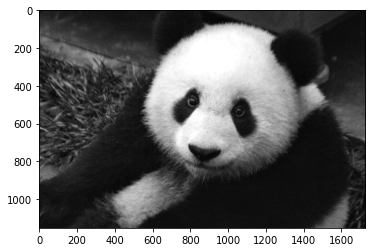

In [9]:
panda=panda[:,:,0]
gray() # en escala de grises  
imshow(panda)

Realizamos la descomposición de valores singlares con la función `svd`:

In [10]:
U,S,Vt = svd(panda)
S2= resize(S,[n,1])*eye(n,k) #ponemos los valores singulares en una matriz diagonal

Si reconstruimos la imagen con 2 valores singulares, obtenemos algo indistinguible:

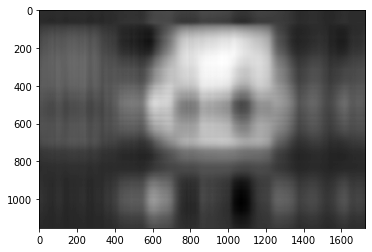

In [11]:
l = 2
imshow(dot(U[:,0:l],dot(S2[0:l,0:l],Vt[0:l,:])))

Con 5 el panda comienza a delinearse:

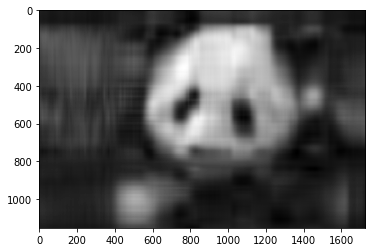

In [12]:
l = 5
imshow(dot(U[:,0:l],dot(S2[0:l,0:l],Vt[0:l,:])))

La pregunta es entonces cuantos valores singulares necesitamos. Si los graficamos, vemos que rápidamente el valor cae a 0.

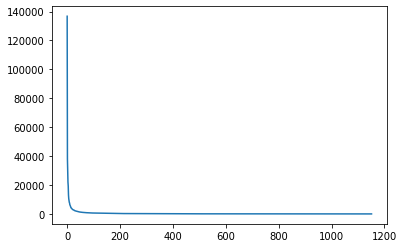

In [13]:
import matplotlib.pyplot as plt
x_coordinate = [i for i in range(len(S)) ]
plt.plot(x_coordinate,S) 
plt.show()

Si calculamos la proporción de varianza explicada, vemos que con 20 valores singulares explicamos mas del 99% de la varianza

In [14]:
var_explained = np.round(S**2/np.sum(S**2), decimals=6)
sum(var_explained[0:18])

0.990389

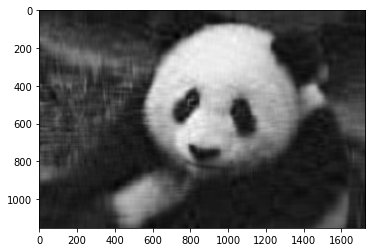

In [15]:
l = 18
imshow(dot(U[:,0:l],dot(S2[0:l,0:l],Vt[0:l,:])))

De hecho, con 18 valores singulares el panda se puede ver claramente. En efecto pudimos reducir aproximadamente la imagen original en un 97%. Esto principalmente se debe a que los pixeles adyacentes están fuertemente correlacionados entre si y la SVD nos permite quizás encontrar combinación de estos que nos permite reducir el espacio en el cual viven nuestros datos.

## Referencias


-   DANE (29 de Septiembre de 2020). Encuesta nacional de presupuestos
    de los hogares (ENPH). Anexos: 32 ciudades y 6 ciudades intermedias.
    <https://www.dane.gov.co/files/investigaciones/boletines/enph/ciudades-enph-2017.xls>

-   Deisenroth, M. P., Faisal, A. A., & Ong, C. S. (2020). Mathematics
    for machine learning. Cambridge University Press.

-   Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.

-   Hastie, T., Tibshirani, R., & Friedman, J. H. (2009). The elements of statistical learning: data mining, inference, and prediction. 2nd ed. New York: Springer.

-   Murphy, K. P. (2012). Machine learning: a probabilistic perspective.
    MIT press.

-   Peña, D. (2002). Análisis de datos multivariantes (Vol. 24). Madrid:
    McGraw-hill.

